In [1]:
import pandas as pd
import numpy as np

# required librairies for data visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("bmw.csv")

display(df.head())
display(df.info())

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,50.4,3.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   mpg           10781 non-null  float64
 7   engineSize    10781 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 673.9+ KB


None

In [3]:
df["engineSize"].value_counts().sort_index()

0.0      47
0.6       7
1.0       1
1.5    1463
1.6     109
1.9       5
2.0    6575
2.2       6
2.5      14
2.8       2
3.0    2458
3.2       5
3.5       1
4.0       6
4.4      79
5.0       1
6.6       2
Name: engineSize, dtype: int64

## Correlation

In [4]:
correlation_matrix = df.corr()
display(correlation_matrix)

mask = np.zeros_like(correlation_matrix)
print(mask)

mask[np.triu_indices_from(mask)] = True
print(mask)

,year,price,mileage,mpg,engineSize
year,1.000000,0.623756,-0.774382,-0.071762,-0.026337
price,0.623756,1.000000,-0.605397,-0.204882,0.460196
mileage,-0.774382,-0.605397,1.000000,0.118609,-0.002540
mpg,-0.071762,-0.204882,0.118609,1.000000,-0.399844
engineSize,-0.026337,0.460196,-0.002540,-0.399844,1.000000


[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1.]
 [0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 1.]]


## Heatmap

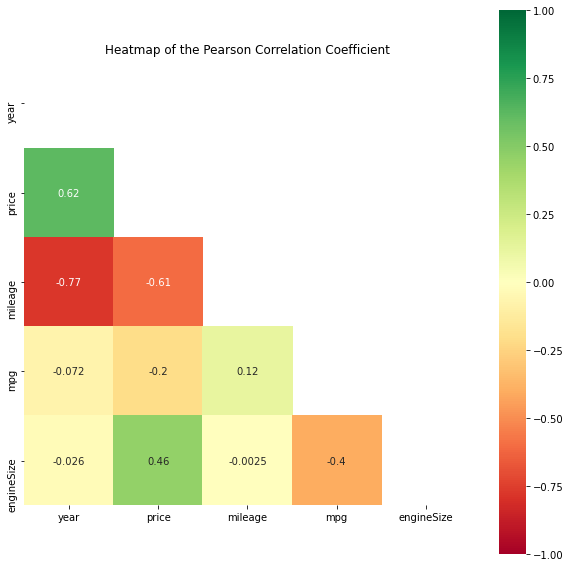

In [5]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, 
            square=True,
            vmax=1.0, vmin=-1.0,
            cmap="RdYlGn",
            annot=True,
            mask=mask)

plt.title("Heatmap of the Pearson Correlation Coefficient")
plt.show()

## Time-series plot: earthquakes dataset

In [7]:
earthquakes = pd.read_csv("earthquakes.csv")

display(earthquakes.head())
display(earthquakes.tail())
print(earthquakes.info())
print(earthquakes.shape)

,date,Year,earthquakes_per_year
0,1900-01-01,1900,13.0
1,1901-01-01,1901,14.0
2,1902-01-01,1902,8.0
3,1903-01-01,1903,10.0
4,1904-01-01,1904,16.0


,date,Year,earthquakes_per_year
94,1994-01-01,1994,15.0
95,1995-01-01,1995,25.0
96,1996-01-01,1996,22.0
97,1997-01-01,1997,20.0
98,1998-01-01,1998,16.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  99 non-null     object 
 1   Year                  99 non-null     int64  
 2   earthquakes_per_year  99 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.4+ KB
None
(99, 3)


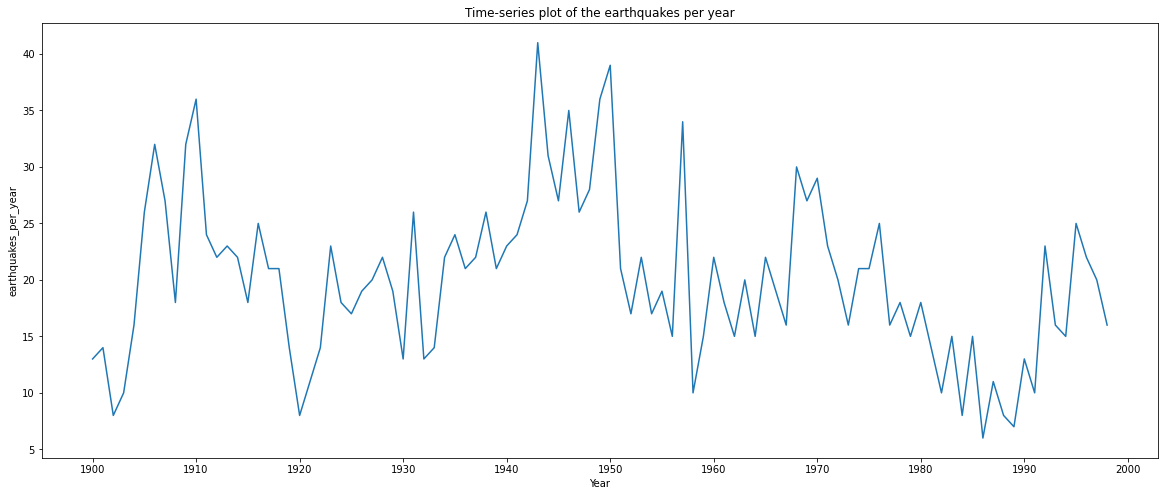

In [8]:
plt.figure(figsize=(20,8))
sns.lineplot(x="Year", y="earthquakes_per_year", data=earthquakes)

plt.title("Time-series plot of the earthquakes per year")
plt.xticks(np.arange(earthquakes["Year"].min(), earthquakes["Year"].max()+10, 10))
# plt.grid()
plt.show()

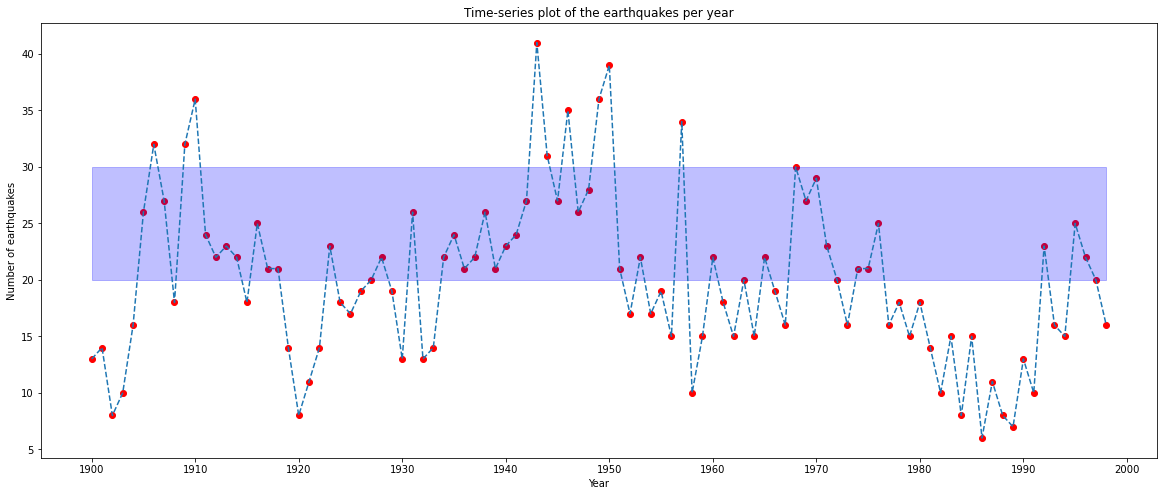

In [9]:
plt.figure(figsize=(20,8))
plt.plot(earthquakes["Year"], earthquakes["earthquakes_per_year"], linestyle="--")
plt.scatter(earthquakes["Year"], earthquakes["earthquakes_per_year"], marker="o", color="red")

plt.fill_between(earthquakes["Year"], 20, 30, color="b", alpha=0.25)

plt.title("Time-series plot of the earthquakes per year")
plt.xticks(np.arange(earthquakes["Year"].min(), earthquakes["Year"].max()+10, 10))
# plt.grid()

plt.xlabel("Year")
plt.ylabel("Number of earthquakes")
plt.show()

## Time-series plot: CO2 dataset

In [10]:
co2 = pd.read_csv("co2.csv")
co2['date'] = pd.to_datetime(co2['date'])

display(co2.head())
display(co2.tail())
display(co2.info())
print(co2.shape)

,date,CO2_ppm
0,1958-03-01,315.71
1,1958-04-01,317.45
2,1958-05-01,317.50
3,1958-06-01,317.10
4,1958-07-01,315.86


,date,CO2_ppm
722,2018-05-01,411.24
723,2018-06-01,410.79
724,2018-07-01,408.71
725,2018-08-01,406.99
726,2018-09-01,405.51


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727 entries, 0 to 726
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     727 non-null    datetime64[ns]
 1   CO2_ppm  727 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.5 KB


None

(727, 2)


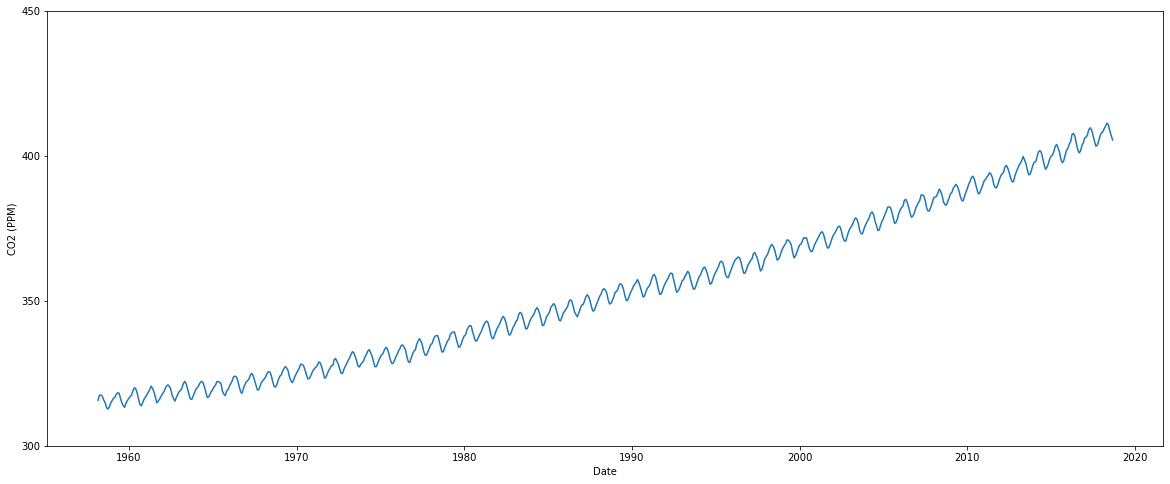

In [11]:
plt.figure(figsize=(20,8))
plt.plot(co2["date"], co2["CO2_ppm"])

plt.xlabel("Date")
plt.ylabel("CO2 (PPM)")
plt.yticks(np.arange(300, 500, 50))
plt.show()